In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [4]:
df = pd.read_csv("http://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0517b17c0>,
      dtype=object)

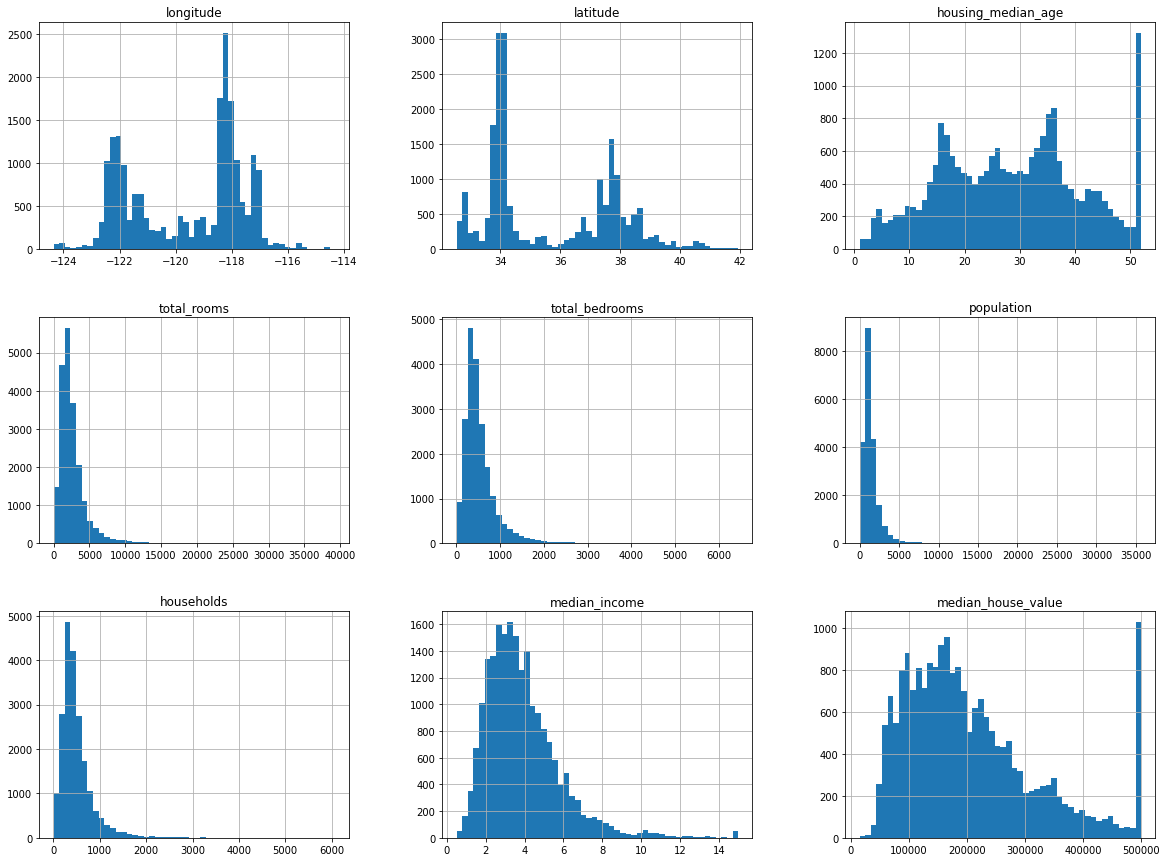

In [5]:
df.hist(bins=50, figsize=(20,15))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


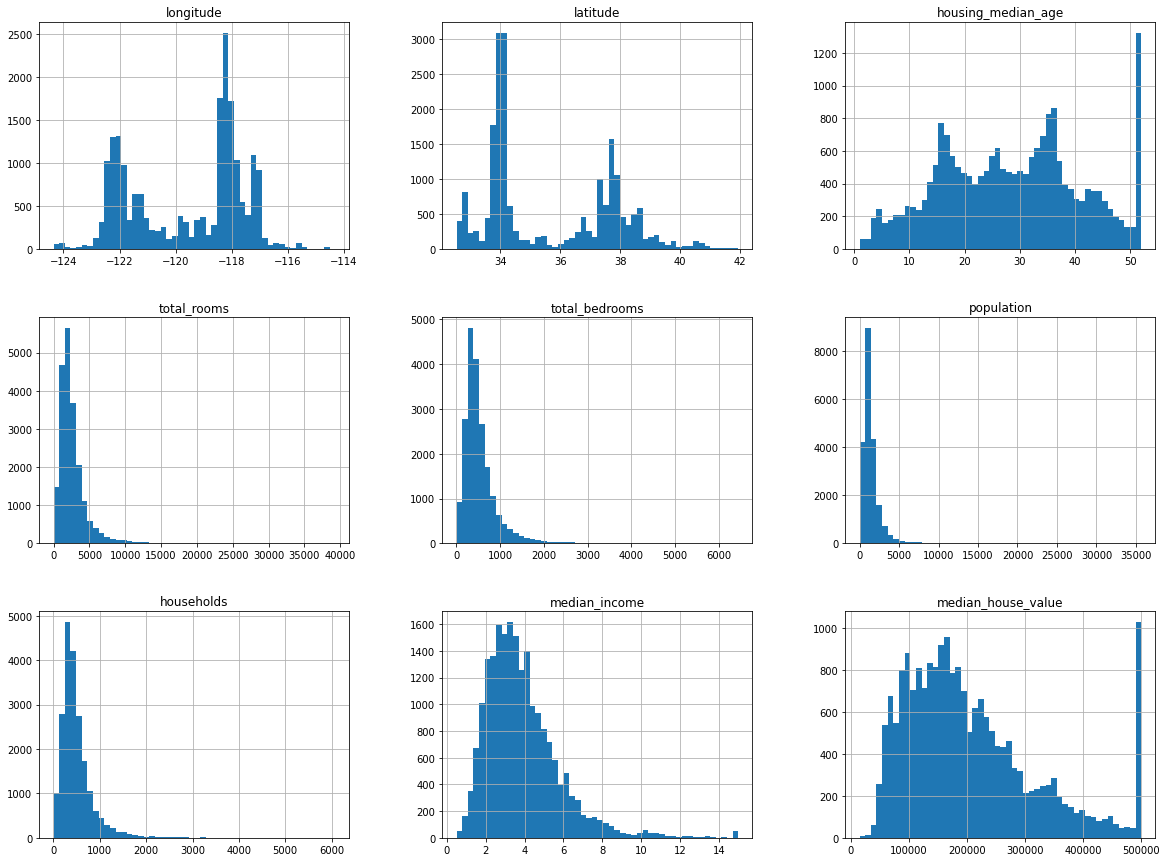

In [9]:
%matplotlib inline 
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=35)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,204200.0,NEAR BAY
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,95600.0,INLAND
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,112000.0,<1H OCEAN
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,410000.0,NEAR OCEAN
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,51600.0,INLAND


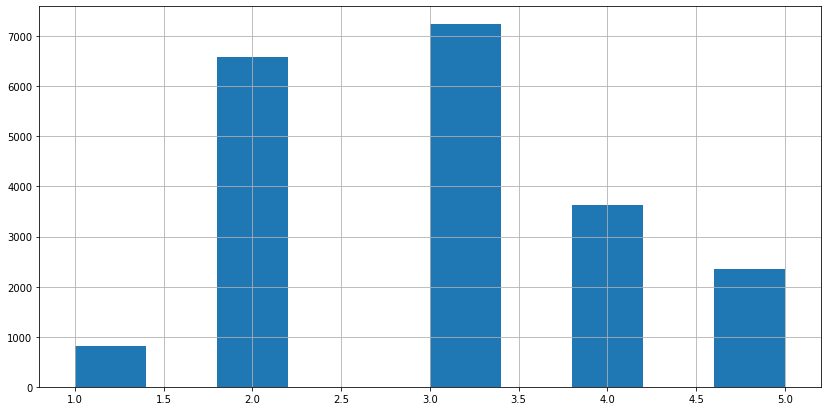

In [11]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])
df["income_cat"].hist(figsize=(14,7))
plt.show()

In [12]:
# we are going to use this if we want to make balance the data 
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_index, test_index in stratified_split.split(df, df["income_cat"]):
  stran_train_set = df.loc[train_index]
  stran_test_set = df.loc[test_index]

stran_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
8049,-118.17,33.83,45.0,2019.0,363.0,880.0,339.0,4.1023,217300.0,NEAR OCEAN,3
19922,-119.35,36.32,10.0,3817.0,719.0,1686.0,714.0,3.8235,94600.0,INLAND,3
2827,-119.09,35.43,28.0,254.0,35.0,118.0,37.0,4.8571,237500.0,INLAND,4
3905,-118.50,34.20,18.0,4249.0,933.0,2047.0,909.0,4.1304,229100.0,<1H OCEAN,3
16992,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0,NEAR BAY,4


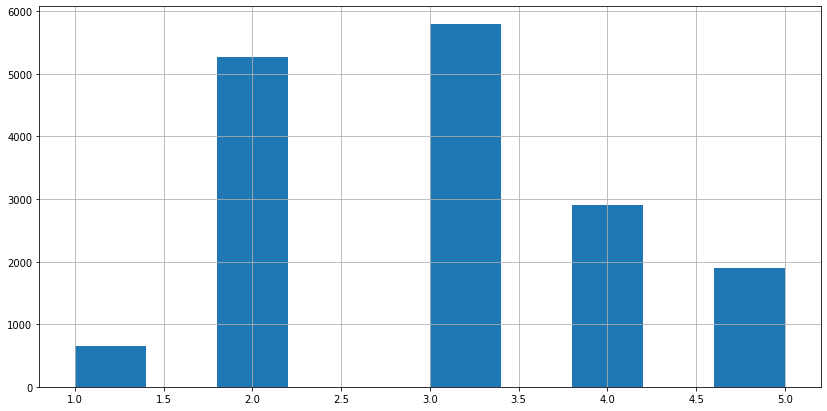

In [13]:
stran_train_set["income_cat"].hist(figsize=(14,7))
plt.show()

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [15]:
stran_train_set.drop("income_cat", axis=1, inplace=True)
stran_test_set.drop("income_cat", axis=1, inplace=True)

In [16]:
housing = stran_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8049,-118.17,33.83,45.0,2019.0,363.0,880.0,339.0,4.1023,217300.0,NEAR OCEAN
19922,-119.35,36.32,10.0,3817.0,719.0,1686.0,714.0,3.8235,94600.0,INLAND
2827,-119.09,35.43,28.0,254.0,35.0,118.0,37.0,4.8571,237500.0,INLAND
3905,-118.50,34.20,18.0,4249.0,933.0,2047.0,909.0,4.1304,229100.0,<1H OCEAN
16992,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0,NEAR BAY


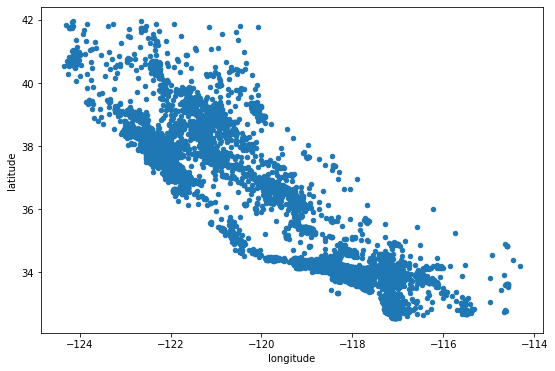

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9,6))
plt.show()

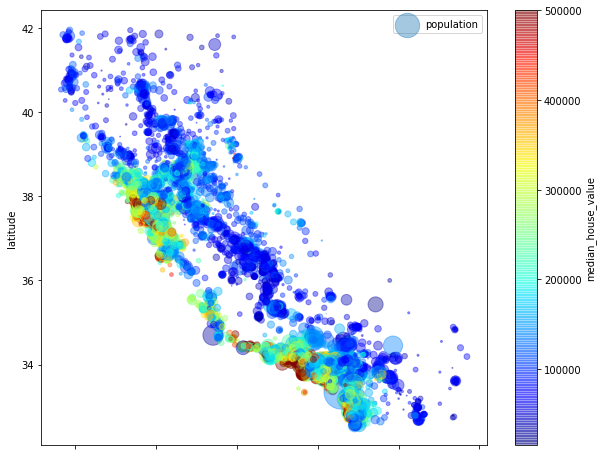

In [18]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"]/30,
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()

In [19]:
housing.corrwith(housing["median_house_value"]).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690524
total_rooms           0.135181
housing_median_age    0.107264
households            0.066213
total_bedrooms        0.049873
population           -0.024179
longitude            -0.040286
latitude             -0.148113
dtype: float64

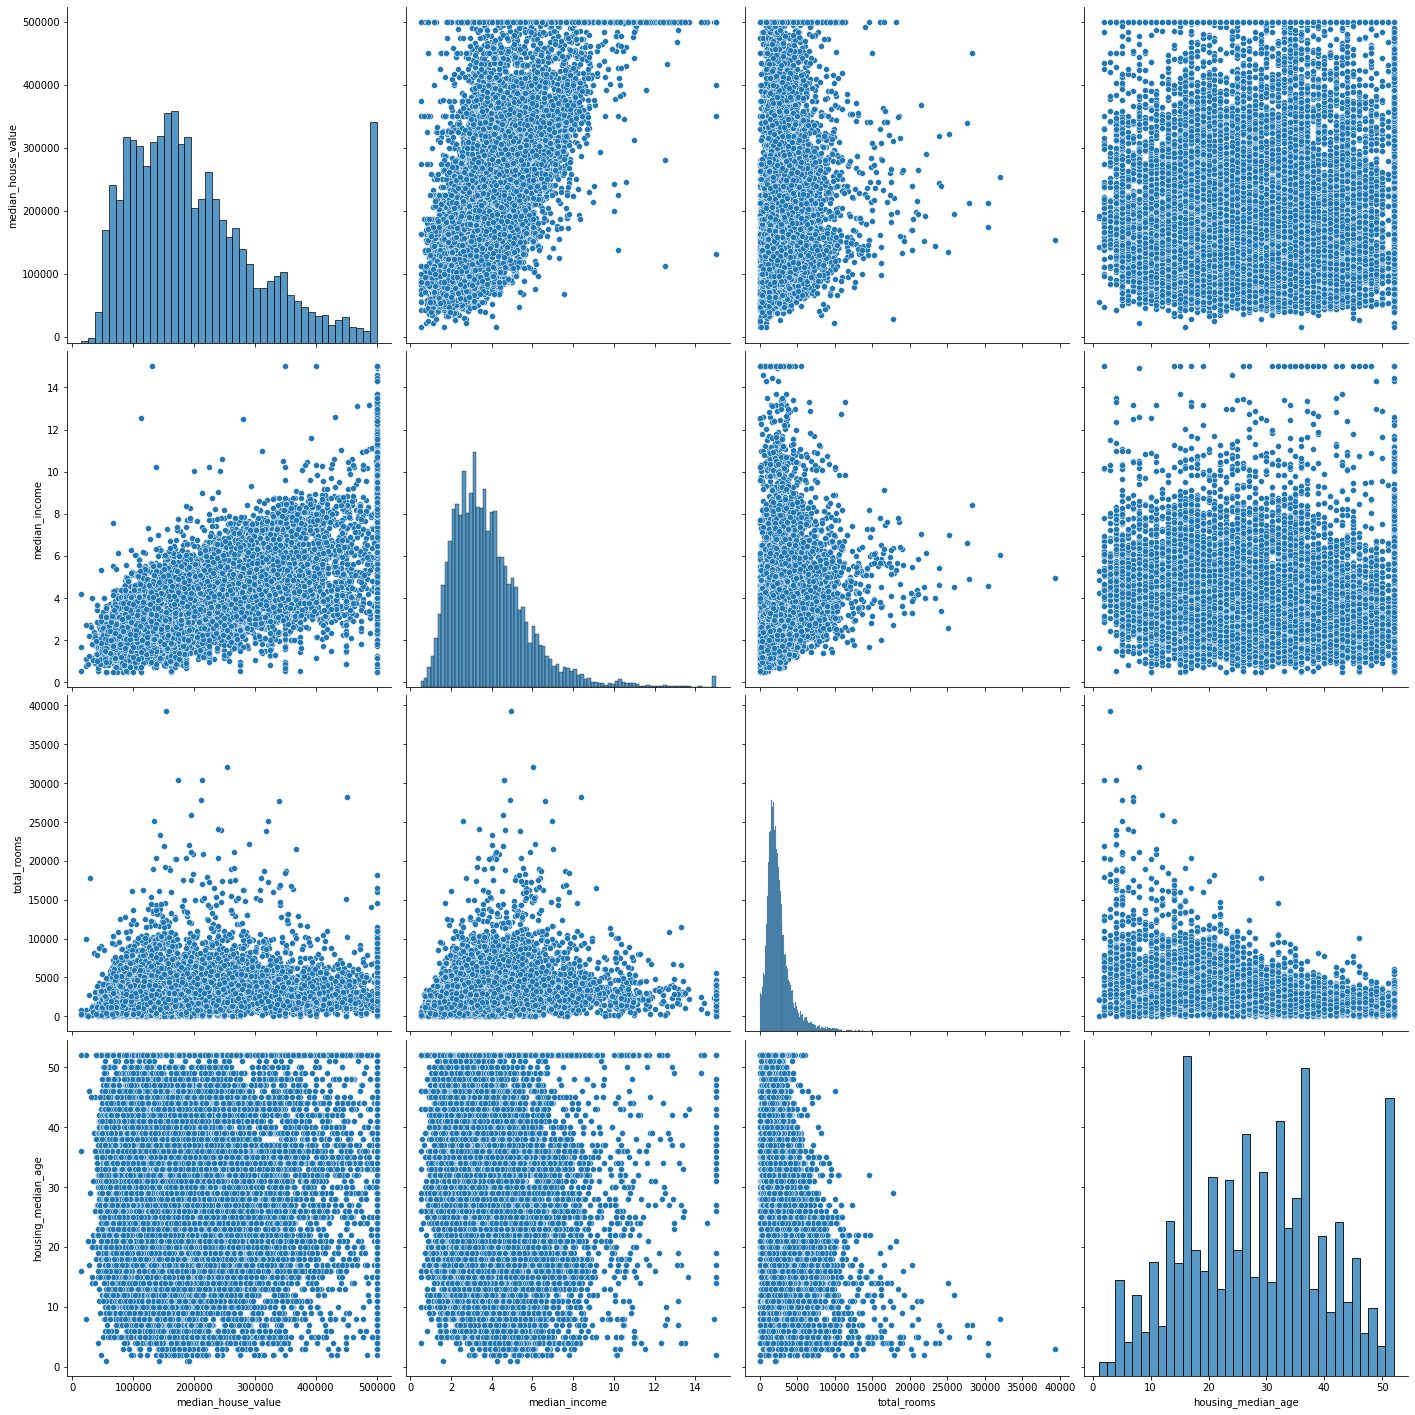

In [20]:
cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(housing[cols], height=5)
plt.show()

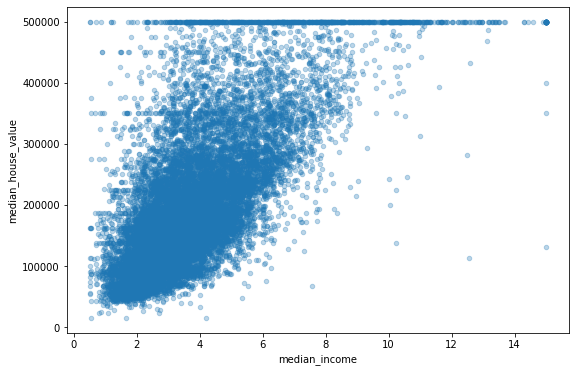

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3, figsize=(9,6))
plt.show()

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
8049,-118.17,33.83,45.0,2019.0,363.0,880.0,339.0,4.1023,217300.0,NEAR OCEAN,5.955752,0.179792,2.595870
19922,-119.35,36.32,10.0,3817.0,719.0,1686.0,714.0,3.8235,94600.0,INLAND,5.345938,0.188368,2.361345
2827,-119.09,35.43,28.0,254.0,35.0,118.0,37.0,4.8571,237500.0,INLAND,6.864865,0.137795,3.189189
3905,-118.50,34.20,18.0,4249.0,933.0,2047.0,909.0,4.1304,229100.0,<1H OCEAN,4.674367,0.219581,2.251925
16992,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0,NEAR BAY,3.954433,0.263781,1.912562


In [24]:
housing.corrwith(housing["median_house_value"]).sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690524
rooms_per_household         0.156075
total_rooms                 0.135181
housing_median_age          0.107264
households                  0.066213
total_bedrooms              0.049873
population_per_household   -0.022856
population                 -0.024179
longitude                  -0.040286
latitude                   -0.148113
bedrooms_per_room          -0.257122
dtype: float64

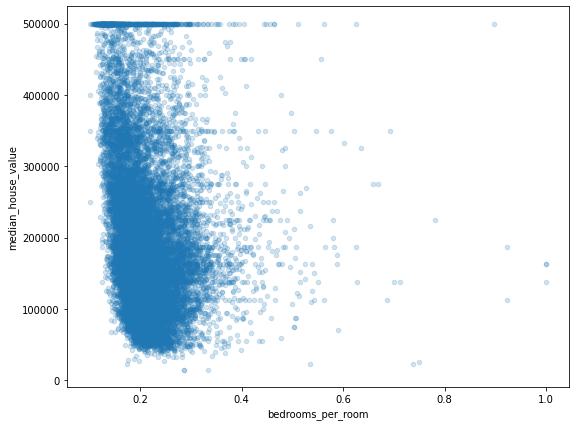

In [25]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.2, figsize=(9,7))
plt.show()

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
8049,-118.17,33.83,45.0,2019.0,363.0,880.0,339.0,4.1023,217300.0,NEAR OCEAN,5.955752,0.179792,2.595870
19922,-119.35,36.32,10.0,3817.0,719.0,1686.0,714.0,3.8235,94600.0,INLAND,5.345938,0.188368,2.361345
2827,-119.09,35.43,28.0,254.0,35.0,118.0,37.0,4.8571,237500.0,INLAND,6.864865,0.137795,3.189189
3905,-118.50,34.20,18.0,4249.0,933.0,2047.0,909.0,4.1304,229100.0,<1H OCEAN,4.674367,0.219581,2.251925
16992,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0,NEAR BAY,3.954433,0.263781,1.912562


In [27]:
housing2 = train_set.drop(["median_house_value"], axis=1)
housing_labels = train_set["median_house_value"].copy()

In [28]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1380 to 5833
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)

8049      363.0
19922     719.0
2827       35.0
3905      933.0
16992     847.0
          ...  
18722     886.0
18579     317.0
16814    1812.0
1863      360.0
14063     602.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# imputer.fit(housing2)
housing_num = housing2.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([-118.495 ,   34.26  ,   29.    , 2120.5   ,  434.    , 1168.5   ,
        408.    ,    3.5338])

In [33]:
X = imputer.transform(housing_num)
X

array([[-1.2209e+02,  3.8000e+01,  6.0000e+00, ...,  4.3770e+03,
         1.7890e+03,  5.2015e+00],
       [-1.1693e+02,  3.3930e+01,  1.3000e+01, ...,  3.2970e+03,
         1.4690e+03,  2.0549e+00],
       [-1.1825e+02,  3.3970e+01,  3.7000e+01, ...,  8.1400e+02,
         2.1300e+02,  2.2917e+00],
       ...,
       [-1.1796e+02,  3.4480e+01,  3.2000e+01, ...,  8.0600e+02,
         2.9900e+02,  4.5769e+00],
       [-1.2184e+02,  3.7320e+01,  2.2000e+01, ...,  2.4910e+03,
         5.3000e+02,  4.3419e+00],
       [-1.1832e+02,  3.4200e+01,  3.6000e+01, ...,  8.3400e+02,
         3.1100e+02,  3.9866e+00]])

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560


In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
house_cat_encoded = ordinal_encoder.fit_transform(housing2[["ocean_proximity"]])
house_cat_encoded[:10]

array([[3.],
       [1.],
       [0.],
       [4.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [36]:
# second method to transform a dataframe's columns which contain the letters
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing2[["ocean_proximity"]])
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [37]:
# we can do the same thing in differend way
housing_onehot = pd.get_dummies(housing["ocean_proximity"])
housing_onehot.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8049,0,0,0,0,1
19922,0,1,0,0,0
2827,0,1,0,0,0
3905,1,0,0,0,0
16992,0,0,0,1,0


In [38]:
from sklearn.base import TransformerMixin, BaseEstimator

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_badrooms_per_room = True):
    self.add_badrooms_per_room = add_badrooms_per_room

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    rooms_per_house = X[:, rooms_ix] / X[: , households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix] 
    if self.add_badrooms_per_room:
      bedrooms_per_room = X[: , bedrooms_ix] / X[:, households_ix]
      return np.c_[X, rooms_per_house, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_house, population_per_household]

attr_adder = CombinedAttributesAdder() 
housing_extra_attr = attr_adder.transform(housing2.values)


In [39]:
housing_extra_attr[0,:]

array([-122.09, 38.0, 6.0, 10191.0, 1882.0, 4377.0, 1789.0, 5.2015,
       'NEAR BAY', 5.69647847959754, 2.446618222470654,
       1.0519843487982112], dtype=object)

In [40]:
housing2.values[0,:]

array([-122.09, 38.0, 6.0, 10191.0, 1882.0, 4377.0, 1789.0, 5.2015,
       'NEAR BAY'], dtype=object)

In [41]:
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,NEAR BAY
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,INLAND
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,<1H OCEAN
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,NEAR OCEAN
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,INLAND


In [42]:
# to put all the values in 0 and 1 range we need to use normalization formula x(new) = (x - x(min)) / (x(max) - x(min))
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit_transform(housing_num)

array([[0.2250996 , 0.58023379, 0.09803922, ..., 0.12259312, 0.29403059,
        0.3242438 ],
       [0.73904382, 0.1477152 , 0.23529412, ..., 0.09232322, 0.24140766,
        0.1072399 ],
       [0.60756972, 0.15196599, 0.70588235, ..., 0.02273046, 0.03486269,
        0.12357071],
       ...,
       [0.63645418, 0.20616366, 0.60784314, ..., 0.02250624, 0.0490051 ,
        0.28116854],
       [0.25      , 0.50797024, 0.41176471, ..., 0.0697329 , 0.08699227,
        0.26496186],
       [0.60059761, 0.17640808, 0.68627451, ..., 0.02329101, 0.05097846,
        0.24045875]])

In [43]:
# the new method is standartization x(new) = (x - M(myu mean value)) / G(sigma standart deviation)
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing_num)

array([[-1.25390838,  1.10757958, -1.79230424, ...,  2.57514612,
         3.36084902,  0.69829788],
       [ 1.31649014, -0.79863258, -1.2367069 , ...,  1.63187609,
         2.52702704, -0.9522322 ],
       [ 0.65894633, -0.77989831,  0.66819829, ..., -0.53677157,
        -0.74572422, -0.82802018],
       ...,
       [ 0.80340671, -0.54103634,  0.27134305, ..., -0.54375875,
        -0.52163456,  0.37066771],
       [-1.12937357,  0.78909696, -0.52236745, ...,  0.92791716,
         0.08028068,  0.24739988],
       [ 0.62407658, -0.67217624,  0.58882724, ..., -0.51930361,
        -0.49036624,  0.0610294 ]])

In [44]:
import pandas as pd
import numpy as np
import sklearn

df = pd.read_csv("http://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true")

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("median_house_value", axis=1)
y = train_set["median_house_value"].copy()

X_num = X_train.drop("ocean_proximity", axis=1)

In [45]:
from sklearn.base import TransformerMixin, BaseEstimator

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_badrooms_per_room = True):
    self.add_badrooms_per_room = add_badrooms_per_room

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    rooms_per_house = X[:, rooms_ix] / X[: , households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_badrooms_per_room:
      bedrooms_per_room = X[: , bedrooms_ix] / X[:, households_ix]
      return np.c_[X, rooms_per_house, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_house, population_per_household]



In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("attr_adder", CombinedAttributesAdder(add_badrooms_per_room = True)),
    ("std_scaler", StandardScaler())
])

# num_pipeline.fit_transform(housing_num)

In [47]:
num_attr = list(housing_num)
cat_attr = ["ocean_proximity"]
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", OneHotEncoder(), cat_attr)
])

X_prepared = full_pipeline.fit_transform(X_train)

In [48]:
X_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [49]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [50]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [51]:
test_data = X_train.sample(10)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8290,-118.16,33.72,29.0,2743.0,708.0,1059.0,651.0,3.6250,NEAR OCEAN
17137,-122.16,37.46,32.0,2663.0,661.0,1403.0,733.0,4.2667,NEAR BAY
8204,-118.16,33.78,14.0,1709.0,558.0,1939.0,520.0,1.9808,NEAR OCEAN
2030,-119.74,36.72,25.0,3972.0,842.0,2863.0,729.0,2.1304,INLAND
2116,-119.72,36.75,11.0,4832.0,993.0,2190.0,888.0,2.6611,INLAND
19411,-120.97,37.73,19.0,3725.0,543.0,1412.0,463.0,5.7476,INLAND
8120,-118.18,33.79,42.0,1571.0,435.0,1631.0,417.0,1.6384,NEAR OCEAN
9584,-120.49,37.32,13.0,3474.0,927.0,2149.0,821.0,1.9528,INLAND
1370,-122.16,38.02,40.0,1800.0,290.0,761.0,277.0,5.1265,NEAR BAY
9286,-122.56,38.06,19.0,15622.0,2721.0,6109.0,2615.0,5.0965,NEAR BAY


In [52]:
test_label = y.loc[test_data.index]
test_label

8290     500000.0
17137    410200.0
8204     139100.0
2030      58500.0
2116      74700.0
19411    248600.0
8120     128000.0
9584      85300.0
1370     196100.0
9286     295300.0
Name: median_house_value, dtype: float64

In [53]:
test_data_prepared = full_pipeline.transform(test_data)
predicted_labels = LR_model.predict(test_data_prepared)

In [54]:
predicted_labels 

array([264988.46186605, 287180.48485061, 132095.45904268,  59579.19400581,
       109304.06130836, 216195.89216122, 143084.04383016,  90567.51953465,
       275316.59134102, 350921.37339443])

In [55]:
pd.DataFrame({"Predicted_data": predicted_labels, "Actual_data": test_label})

,Predicted_data,Actual_data
8290,264988.461866,500000.0
17137,287180.484851,410200.0
8204,132095.459043,139100.0
2030,59579.194006,58500.0
2116,109304.061308,74700.0
19411,216195.892161,248600.0
8120,143084.043830,128000.0
9584,90567.519535,85300.0
1370,275316.591341,196100.0
9286,350921.373394,295300.0


In [56]:
# Evaluating the model
X_test = test_set.drop("median_house_value", axis=1)
X_test.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN


In [57]:
y_test = test_set["median_house_value"].copy()
y_test.head()

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64

In [58]:
X_test_prepared = full_pipeline.transform(X_test)
y_predicted = LR_model.predict(X_test_prepared)
y_predicted

array([ 57236.26139797, 124467.8617533 , 270841.70339907, ...,
       442160.86684822, 119051.30581628, 185565.52484854])

In [59]:
# checking errors
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, y_predicted)
print("MSE=", mae)


MSE= 51194.998835221544


In [60]:
mse = mean_squared_error(y_test, y_predicted)
print("RMSE=", np.sqrt(mse))

RMSE= 73427.42927911709


In [61]:
# Random Forest Method
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [62]:
y_predicted = RF_model.predict(X_test_prepared) 

In [63]:
mse = mean_squared_error(y_test, y_predicted)
print("RMSE=", np.sqrt(mse))

RMSE= 50179.27715093585


In [64]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"].copy()

X_prepared = full_pipeline.transform(X)

In [65]:
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)

In [66]:
def display_score(scores):
  print("Score", scores)
  print("Mean", scores.mean())
  print("SD", scores.std())

In [67]:
display_score(np.sqrt(-mse_scores))

Score [74089.43322189 75576.59707293 75677.15737161 77184.60231709
 66363.25166305]
Mean 73778.20832931309
SD 3834.636171391451


In [68]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
display_score(np.sqrt(-scores))

Score [97067.68767875 47630.36479189 65385.06406789 56371.02920782
 60783.73859487 60188.51622806 46728.99824445 77965.77957212
 74397.44688518 49536.39111568]
Mean 63605.50163867072
SD 15018.340001049692


In [ ]:
import pickle

filename = "RF_model.pkl"
with open(filename, "wb") as file:
  model = pickle.dump(RF_model, file)

In [ ]:
import joblib

filename = "LR_model.jbl"
joblib.dump(LR_model, filename)

In [ ]:
model = joblib.load(filename)

In [ ]:
scores = cross_val_score(model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
display_score(np.sqrt(-scores))